709
Mean absolute error: 225.88
Mean squared error: 69693.88
Root mean squared error: 264.00


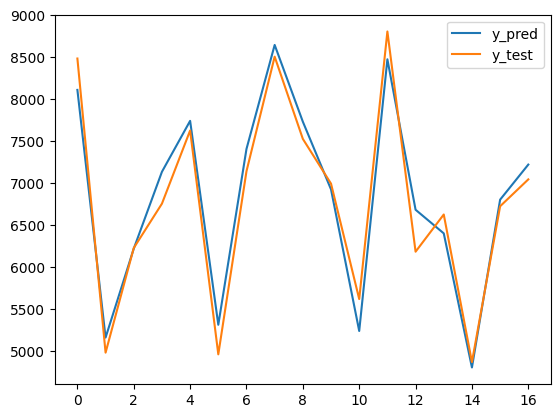

CPU times: total: 4.02 s
Wall time: 10.5 s


In [42]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report

df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\excel correct copy.xlsx")
df = df.drop(df.index[:13])
df = df.drop(df.index[-12:])
"""
# make a normalized copy of df
df_min_max_scaled = df.copy()
columns = ['repo', 'cena', 'doba', 'nove', 'zobrazeni']
for column in columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())	
display(df_min_max_scaled)
X= df_min_max_scaled[['datum', 'repo']]
Y= df_min_max_scaled[['aktivni']]
"""
import time
timeout = time.time() + 10 
best_rmse = 100000000000
iteration = 0
#X= df[['datum', 'repo', 'cena', 'doba', 'nove', 'zobrazeni']]
X = df[['datum', 'repo', 'repo-1', 'repo-2', 'repo-3', 'repo-4', 'repo-5', 'repo-6', 'repo-7',
        'aktivni-1', 'aktivni-2', 'aktivni-3', 'aktivni-4', 'aktivni-5', 'aktivni-6', 'aktivni-7', 
        'cena-1','cena-2','cena-3','cena-4','cena-5','cena-6','cena-7',
        'zobrazeni-1','zobrazeni-2','zobrazeni-3','zobrazeni-4','zobrazeni-5','zobrazeni-6','zobrazeni-7',
        'doba-1','doba-2','doba-3','doba-4','doba-5','doba-6','doba-7']]
Y = df[['aktivni']]
while time.time() < timeout:
    iteration +=1
    X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
    # Train the model on the train set
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    # Predict on the test set
    y_pred = linreg.predict(X_test)
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    if rmse < best_rmse:
        best_rmse = rmse
        model = linreg


print(iteration)

# Predict on the test set
y_pred = model.predict(X_test)
# Evaluate the best model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean absolute error: {mae:.2f}")
print(f"Mean squared error: {mse:.2f}")
print(f"Root mean squared error: {rmse:.2f}")
import matplotlib.pyplot as plt
plt.plot(y_pred, label='y_pred')
#plt.plot(y_train.values, label='y_train')
plt.plot(y_test.values, label='y_test')
plt.legend()
plt.show()


uložit model

In [45]:
#ulozit model
import pickle
nejlepsi_rmse = 237

filename = 'finalized_model_7_months237.sav'
pickle.dump(model, open(filename, 'wb'))

předpověď

             0   datum
0  8027.685493  202302


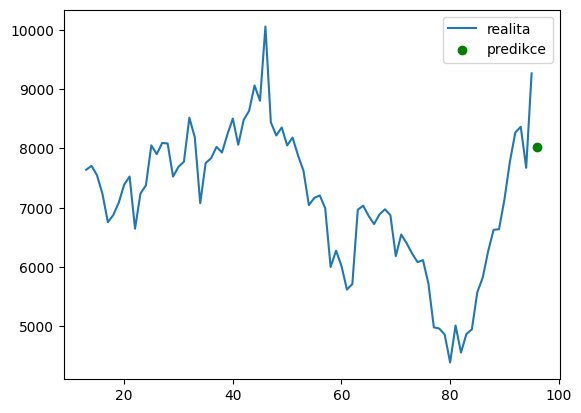

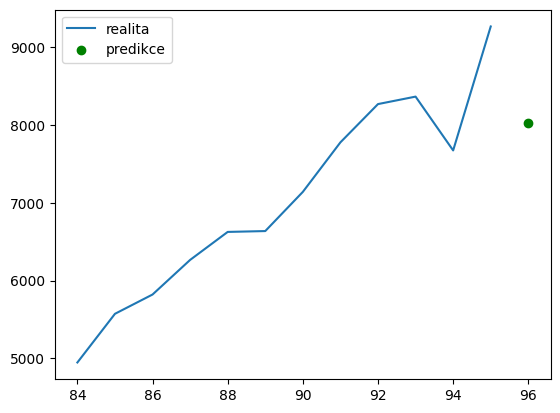

In [43]:
import pickle
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\excel correct copy.xlsx")
df = df.drop(df.index[:-12])
# nacist nejlepsi model
filename = 'finalized_model_7_months.sav'
loaded_model = pickle.load(open(filename, 'rb'))
x_new = df[['datum', 'repo', 'repo-1', 'repo-2', 'repo-3', 'repo-4', 'repo-5', 'repo-6', 'repo-7',
        'aktivni-1', 'aktivni-2', 'aktivni-3', 'aktivni-4', 'aktivni-5', 'aktivni-6', 'aktivni-7', 
        'cena-1','cena-2','cena-3','cena-4','cena-5','cena-6','cena-7',
        'zobrazeni-1','zobrazeni-2','zobrazeni-3','zobrazeni-4','zobrazeni-5','zobrazeni-6','zobrazeni-7',
        'doba-1','doba-2','doba-3','doba-4','doba-5','doba-6','doba-7']]

x_new_short = x_new.drop(x_new.index[:-12])
x_new_short = x_new.drop(x_new.index[-11:])
# Predikce na novych datech
y_new_pred = loaded_model.predict(x_new_short)

# vytiskonut vysledky
new_df = pd.DataFrame(y_new_pred)
x_new_reset = x_new_short.reset_index()
new_df = pd.concat([new_df, x_new_reset.iloc[:,1]], axis=1)
print(new_df)

#graf od 2014
plt.plot(X.index.values,Y, label='realita')
plt.scatter(x_new_short.index.values, y_new_pred[0], color='green', label="predikce")
plt.legend()
plt.show()

#graf posledni rok
plt.plot(X.index[-12:].values,Y[-12:], label='realita')
plt.scatter(x_new_short.index.values, y_new_pred[0], color='green', label="predikce")
plt.legend()
plt.show()
